`Case study on Credit Risk`

Credit risk is nothing but the default in payment of any loan by the borrower. In Banking sector this is an important factor to 
be considered before approving the loan of an applicant.

Objective

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others.

  Attributes

* Variable:	      Description
* Loan_ID:	          Unique Loan ID
* Gender:	          Male/ Female
* Married:	          Applicant married (Y/N)
* Dependents:	      Number of dependents
* Education:	      Applicant Education (Graduate/ Under Graduate)
* Self_Employed:	  Self employed (Y/N)
* ApplicantIncome:	  Applicant income
* CoapplicantIncome: Coapplicant income
* LoanAmount:	      Loan amount in thousands
* Loan_Amount_Term:  Term of loan in months
* Credit_History:	  credit history meets guidelines
* Property_Area:	  Urban/ Semi Urban/ Rural
* Loan_Status:	      Loan approved (Y/N)



## <a id = "link1"></a> Import Libraries and Load Dataset

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

# importing ploting libraries
import matplotlib.pyplot as plt


#importing seaborn for statistical plots
import seaborn as sns

from sklearn.model_selection import train_test_split

import numpy as np
from scipy import stats

# calculate accuracy measures and confusion matrix
from sklearn import metrics

In [5]:
data = pd.read_csv('CreditRisk.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,1


In [6]:
data.shape

(614, 13)

## <a id = "link2"></a> Univariate Analysis

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    int64  
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 62.5+ KB


In [8]:
#Lets analysze the distribution of the various attribute
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,614.0,141.166124,88.340630,0.0,98.0,125.0,164.75,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0
Loan_Status,614.0,0.687296,0.463973,0.0,0.0,1.0,1.00,1.0


In [9]:
data.nunique() # Number of unique values in a column

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           204
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

**Insights:**
- `Loan_Amount_Term is categorical as it has only 10 unique values`
- `Loan_ID column has all unique values and it not a continous column so it has 614 categories one for each row 

In [10]:
cr_df = data.drop('Loan_ID', axis =1 ) # dropping this column as it will be 1-1 mapping anyways
cr_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,0,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,1


c:\users\shan\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


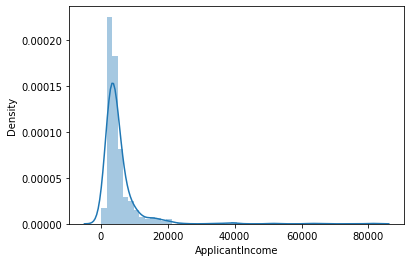

c:\users\shan\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


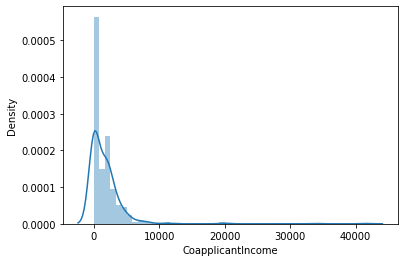

c:\users\shan\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


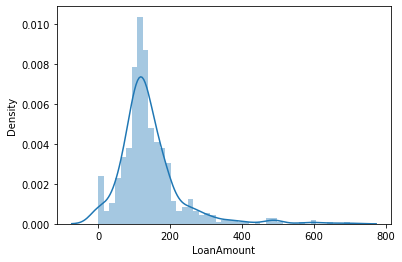

In [11]:
# distplot for continous columns
for i in ['ApplicantIncome','CoapplicantIncome','LoanAmount']:
    sns.distplot(data[i])
    plt.show()

**Insights:**
- `As you can see all the three are skewed but we won't treat it as bank are supposed to have skewed applicants, If we treat the data here it will increase bias`

In [12]:
cr_df['Loan_Amount_Term'].value_counts(normalize=True)

# value counts gives us how many times does the value 

360.0    0.853333
180.0    0.073333
480.0    0.025000
300.0    0.021667
240.0    0.006667
84.0     0.006667
120.0    0.005000
60.0     0.003333
36.0     0.003333
12.0     0.001667
Name: Loan_Amount_Term, dtype: float64

**Insights:**
- `Loan_Amount_Term most of the values are 360, and rest categories have a very small percentage. So it won't add much value to create dummies of these columns`

In [13]:

cr_df.drop(['Loan_Amount_Term'], axis=1, inplace=True)

In [15]:
#Convert X & Y variable to a categorical variable wherever relevant
cr_df['Loan_Status'] = cr_df['Loan_Status'].astype('category')
cr_df['Credit_History'] = cr_df['Credit_History'].astype('category')

In [16]:
cr_df.dtypes

Gender                 object
Married                object
Dependents             object
Education              object
Self_Employed          object
ApplicantIncome         int64
CoapplicantIncome     float64
LoanAmount              int64
Credit_History       category
Property_Area          object
Loan_Status          category
dtype: object

In [17]:
for i in list(cr_df.columns[cr_df.dtypes=='object']):   # checking value counts of all object type columns
    print(cr_df[i].value_counts(normalize=True))
    print()

Male      0.813644
Female    0.186356
Name: Gender, dtype: float64

Yes    0.651391
No     0.348609
Name: Married, dtype: float64

0     0.575960
1     0.170284
2     0.168614
3+    0.085142
Name: Dependents, dtype: float64

Graduate        0.781759
Not Graduate    0.218241
Name: Education, dtype: float64

No     0.859107
Yes    0.140893
Name: Self_Employed, dtype: float64

Semiurban    0.379479
Urban        0.328990
Rural        0.291531
Name: Property_Area, dtype: float64



In [18]:
#Calculate baseline proportion - ratio of Yes to No to identify data imbalance
prop_Y = cr_df['Loan_Status'].value_counts(normalize=True)
print(prop_Y)

1    0.687296
0    0.312704
Name: Loan_Status, dtype: float64


## <a id = "link3"></a> Null Values Treatment

In [19]:
cr_df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

**Think about it:**

- How will try to fill these null values.
- Is it posiible to draw some relationship between features to fill null values.

In [20]:
#filling Null Values

cr_df['Credit_History'].fillna(0,inplace=True)

cr_df['Self_Employed'].fillna('No',inplace=True) #replacing with mode

cr_df['Dependents'].fillna('0',inplace=True) #replacing with mode

In [21]:
# Drawing relationship between CoapplicantIncome and Gender

cr_df.groupby('Gender')['CoapplicantIncome'].median()

Gender
Female       0.0
Male      1430.0
Name: CoapplicantIncome, dtype: float64

**Insights:**
- `When CoapplicantIncome is 0 and Gender is Female we should fill it with 0.`

In [22]:
## Filling null values in gender whose CoapplicantIncome is 0 with female

z = cr_df[cr_df['CoapplicantIncome']==0]
z['Gender'] = z['Gender'].fillna('Female')

cr_df.update(z)

# .update() works on index values
# so all the value in cr_df will replaced by z values wherever the index value in cr_df are same to z

C:\Users\Shan\AppData\Local\Temp/ipykernel_10276/4023756827.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['Gender'] = z['Gender'].fillna('Female')


In [23]:
cr_df['Gender'].fillna('Male',inplace=True) #replacing remaining values with mode as no other relationship found

In [24]:
#Drawing relationship between Loan_Status, Gender, Property_Area, Married

df.groupby(['Loan_Status','Gender','Property_Area'])['Married'].value_counts()

Loan_Status  Gender  Property_Area  Married
0            Female  Rural          No           7
                                    Yes          3
                     Semiurban      No          12
                                    Yes          1
                     Urban          No          10
                                    Yes          4
             Male    Rural          Yes         39
                                    No          18
                     Semiurban      Yes         27
                                    No          12
                     Urban          Yes         35
                                    No          19
1            Female  Rural          No          12
                                    Yes          2
                     Semiurban      No          22
                                    Yes         19
                     Urban          No          17
                                    Yes          2
             Male    Rural          Ye

In [25]:
cr_df[cr_df['Married'].isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
104,Male,NaN,0,Graduate,No,3816.0,754.0,160.0,1.0,Urban,1.0
228,Male,NaN,0,Graduate,No,4758.0,0.0,158.0,1.0,Semiurban,1.0
435,Female,NaN,0,Graduate,No,10047.0,0.0,0.0,1.0,Semiurban,1.0


**Insights:**
- `When Gender is Male Loan Status is 1 and Propert_Area is Urban then mostly they are married.(mode)`

In [26]:
## Replacing with mode observed in above mentioned relationship:

cr_df.loc[104,'Married'] = 'Yes'
cr_df.loc[228,'Married'] = 'Yes'
cr_df.loc[435,'Married'] = 'No'

In [27]:
cr_df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## <a id = "link4"></a> Bivariate Analysis

**Think about it:**

- In this case-study, we are going to apply Logistic Regression.
- But even before we apply, let's have a look at the data to see how each attribute is different when loan status is yes or not.
- To check it, we ll have to use groupby and crosstabs.

In [28]:
# Let us look at the target column which is 'Loan_Status' to understand how the data is distributed amongst the various values
cr_df.groupby(["Loan_Status"]).mean()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History
Loan_Status,,,,
0.0,5446.078125,1877.807292,142.557292,0.505208
1.0,5384.068720,1504.516398,140.533175,0.895735


In [29]:
cr_df.groupby(["Loan_Status"]).median()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History
Loan_Status,,,,
0.0,3833.5,268.0,126.5,1.0
1.0,3812.5,1239.5,125.0,1.0


**Insights:**
- `No major difference in case of ApplicantIncome and LoanAmount values w.r.t. target variable`

- `But CoapplicantIncome is higher for people who take loan`

In [30]:
pd.crosstab(cr_df['Self_Employed'],cr_df['Loan_Status'],normalize='columns')

Loan_Status,0.0,1.0
Self_Employed,,
No,0.864583,0.867299
Yes,0.135417,0.132701


**Insights:**
- `Self Employed people have same distribution, We should check how this feature influences final model using coefficients`

In [31]:
pd.crosstab(cr_df['Property_Area'],cr_df['Loan_Status'],normalize='columns')

Loan_Status,0.0,1.0
Property_Area,,
Rural,0.359375,0.260664
Semiurban,0.281250,0.424171
Urban,0.359375,0.315166


**Insights:**
- `Semi Urban people are taking more loans`

In [32]:
pd.crosstab(cr_df['Dependents'],cr_df['Loan_Status'],normalize='index')

Loan_Status,0.0,1.0
Dependents,,
0,0.313889,0.686111
1,0.352941,0.647059
2,0.247525,0.752475
3+,0.352941,0.647059


**Insights:**
- `Number of dependents have no relationship with Loan_status therfore Dependents is a nominal categorical variable`

Model building using Logistic Regression from Sklearn 

We will use the sklearn library to build the model and make predictions

In [33]:
## Define X and Y variables

X = cr_df.drop('Loan_Status', axis=1)
Y = cr_df['Loan_Status'].astype('category')     



In [34]:
#Convert categorical vriables to dummy variables
X = pd.get_dummies(X, drop_first=True)

**Think about it**

- How does drop first help and why we do it
  - It reduces the number of columns and hence increases the computational time.

In [35]:
##Split into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=7)

In [36]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=7)
logreg.fit(X_train, y_train)                    # fit the model on train data

LogisticRegression(random_state=7)

In [37]:
y_predict = logreg.predict(X_test)              # Predicting the target variable on test data

In [38]:
# Observe the predicted and observed classes in a dataframe.

z = X_test.copy()
z['Observed Loan Status'] = y_test
z['Predicted Loan Status'] = y_predict
z.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Observed Loan Status,Predicted Loan Status
220,2221.0,0.0,60.0,0.0,1,1,0,0,0,0,0,0,1,0.0,1.0
109,2071.0,754.0,94.0,1.0,1,1,0,0,1,1,0,1,0,1.0,1.0
569,3166.0,2064.0,104.0,0.0,1,1,0,0,0,0,0,0,1,0.0,1.0
330,4384.0,1793.0,117.0,1.0,1,0,1,0,0,0,0,0,1,1.0,1.0
407,2213.0,0.0,66.0,1.0,0,0,0,0,0,1,0,0,0,1.0,1.0


In [39]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

In [40]:
print("Trainig accuracy",logreg.score(X_train,y_train))  
print()
print("Testing accuracy",logreg.score(X_test, y_test))
print()

Trainig accuracy 0.6993006993006993

Testing accuracy 0.6594594594594595



Confusion Matrix


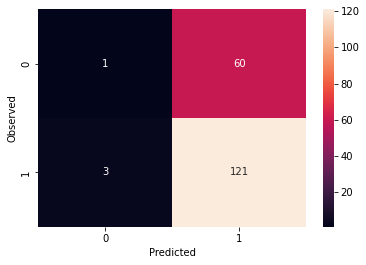


Recall: 0.9758064516129032

Precision: 0.6685082872928176



In [41]:
print('Confusion Matrix')
draw_cm(y_test,y_predict)
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()

In [42]:
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

F1 Score: 0.7934426229508196

Roc Auc Score: 0.49609994711792704


In [ ]:
# !pip install yellowbrick

# Additional

#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
## Feature Importance or Coefficients 
fi = pd.DataFrame()
fi['Col'] = X_train.columns
fi['Coeff'] = np.round(abs(logreg.coef_[0]),4)
fi.sort_values(by='Coeff',ascending=False)

## <a id = "link8"></a>Business Insights 

`Confusion matrix means`

*True Positive (observed=1,predicted=1):*

Predicted that home loan will be granted and the customer was eligibile for loan

*False Positive (observed=0,predicted=1):*

Predicted that home loan will be granted and the customer was not eligibile for loan

*True Negative (observed=0,predicted=0):*

Predicted that home loan will not be granted and the customer was not eligibile for loan

*False Negative (observed=1,predicted=0):*

Predicted that home loan will not be granted and the customer was eligibile for loan

